# Выбор локации для скважины

Исследуем данные, предоставленные сервисом.

## Загрузка и подготовка данных

In [149]:
#импортируем все необходимые библиотеки
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
import warnings
warnings.filterwarnings("ignore")

In [150]:
#сохраним датасеты 
df_0 = pd.read_csv('/datasets/geo_data_0.csv') 
df_1 = pd.read_csv('/datasets/geo_data_1.csv') 
df_2 = pd.read_csv('/datasets/geo_data_2.csv') 

#откроем все датасеты одной функцией и посмотрим всю информацию о них
def info_df(df_0, df_1, df_2): #на вход функция принимает все датасеты сразу
    df_all = [df_0, df_1, df_2]
    for i in df_all:
        display(i.head()) #первые пять строк 
        display(i.info()) #общую информацию 
        display(i.describe()) #статистическую информацию 
        display(i.isna().sum()) #пропуски 
        display(i.duplicated().sum()) #дубликаты 
        display(i.nunique()) #не уникальные значения
                    
display(info_df(df_0, df_1, df_2))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

0

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

0

id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

0

id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

None

Синтаксических и стилистических нарушений нет в именовании столбцов, пропусков и дубликатов во всех трёх датасетах нет. В значениях столбцах есть отрицательные значения. По статистической информации, в каждом датасете есть разброс значений по одному из трёх столбцов. В датасете df_1 всего 12 неуникальных значений, что выглядит довольно странно. Ну так как данные синтетические, то примем как есть. 

Данные геологоразведки трёх регионов находятся в трёх файлах. В каждом фале следующее описание столбцов:
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).
    
Изучим открытые данные.

In [151]:
#Построим графики чтобы посмотреть на распределение
def dist_and_box(df,col):
    global title
    fig, axs = plt.subplots(ncols=2,figsize=(20,5))
    sns.set(font_scale=1.10)
    distplot = sns.distplot(df[col],ax=axs[0]).set_title(f'DataFrame №{title}',fontsize=20);
    sns.boxplot(df[col], ax=axs[1]).set_title(f'DataFrame №{title}',fontsize=20)

**Опишем датасет df_0**

In [152]:
df = df_0
title = '0'

In [153]:
#статистическая таблица
df.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


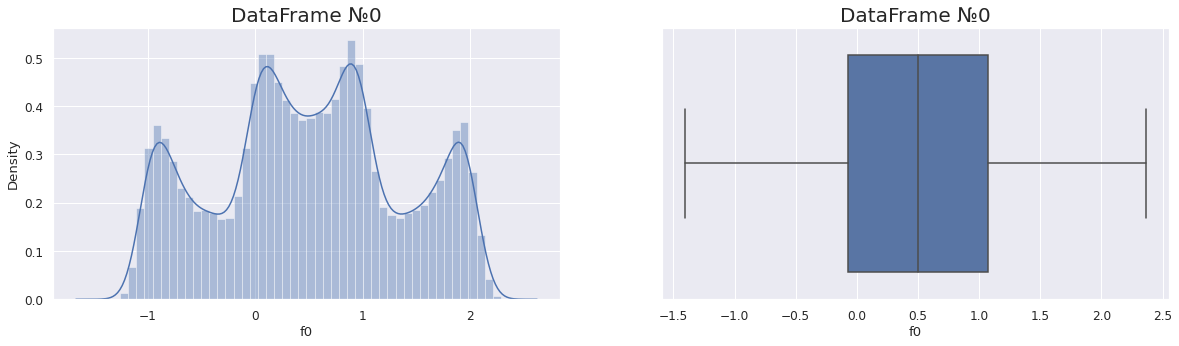

In [154]:
dist_and_box(df,'f0')

По признаку f0 видны четыре пика на значениях -1, 0, 1, 2. Медиана на значении 0,5, выбросов нет.

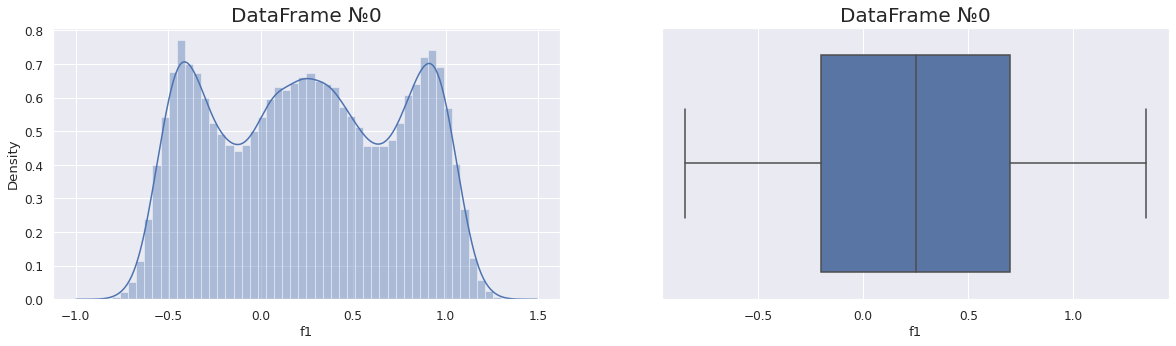

In [155]:
dist_and_box(df,'f1')

По признаку f1 видны три пика на значениях -0,5, 0,25, 1. Медиана на значении 0,25, выбросов нет.

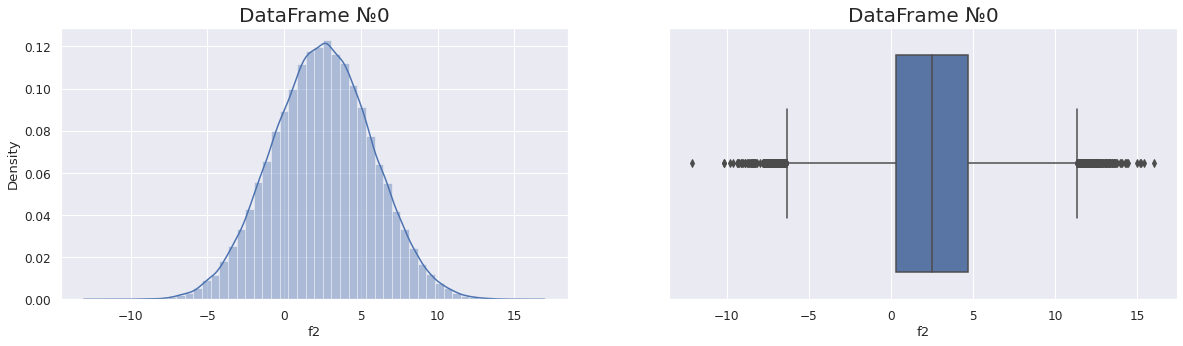

In [156]:
dist_and_box(df,'f2')

По признаку f2 один пик на значении 0,25. Медиана на значении 2,5, есть выбросы после -6 и 11.

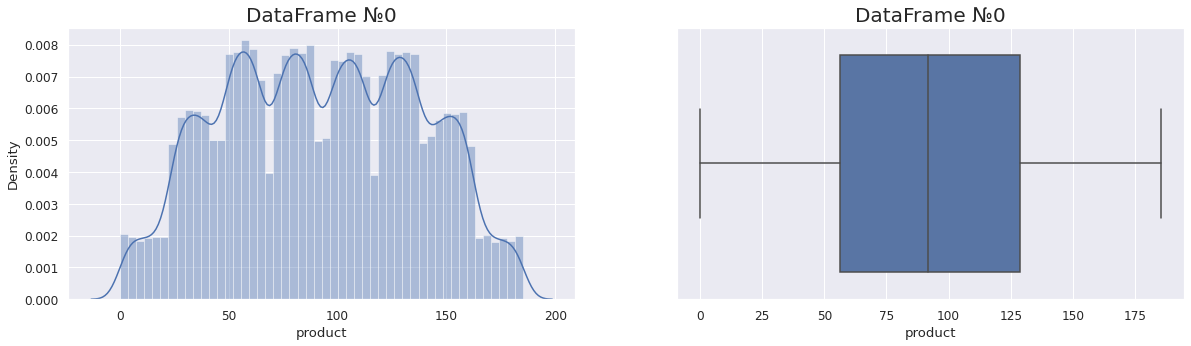

In [157]:
dist_and_box(df,'product')

Есть сильно выделяющихся пика и четыре поменьше, медиана около значсения 60 и график слегка смещён вправо.

Посмотрим на корреляцию.

Величина и сила коэффициента корреляции. Величина коэффициента корреляции отражает силы связи. При оценке силы связи коэффициентов корреляции используется шкала Чеддока (https://statpsy.ru/correlation/velicina/):

|Значение      |Интерпретация|
|:-------------|:------------|
|от 0 до 0,3   |очень слабая |
|от 0 до 0,3   |очень слабая |
|от 0,3 до 0,5 |слабая       |
|от 0, 5 до 0,7|средняя      |
|от 0,7 до 0, 9|высокая      |
|от 0,9 до 1   |очень высокая|

<AxesSubplot:>

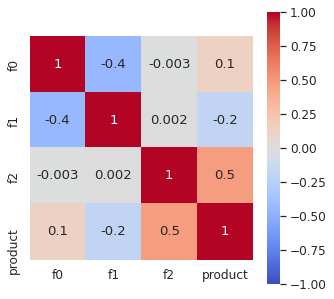

In [158]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True, ax = ax)

Есть сильная корреляция межжду f2 и product, корреляция между столбцами f0 и f1 очень слабаая.

In [159]:
#красивая визуализация, но исполняется долго
#sns.pairplot(data=df, hue = 'product')

**Опишем датасет df_1**

In [160]:
df = df_1
title = '1'

In [161]:
#статистическая таблица
df.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


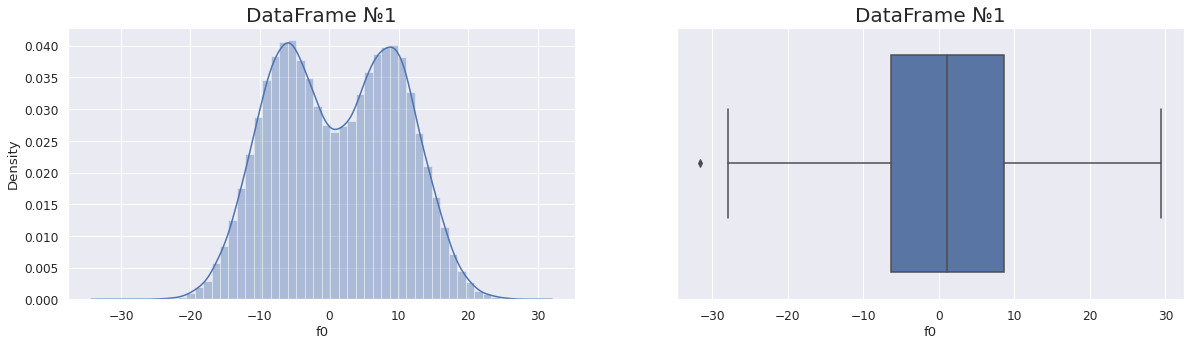

In [162]:
dist_and_box(df,'f0')

По признаку f0 видны два пика на значениях приблизительно -9 и 10. Медиана близка к 0, есть выброс после -30.

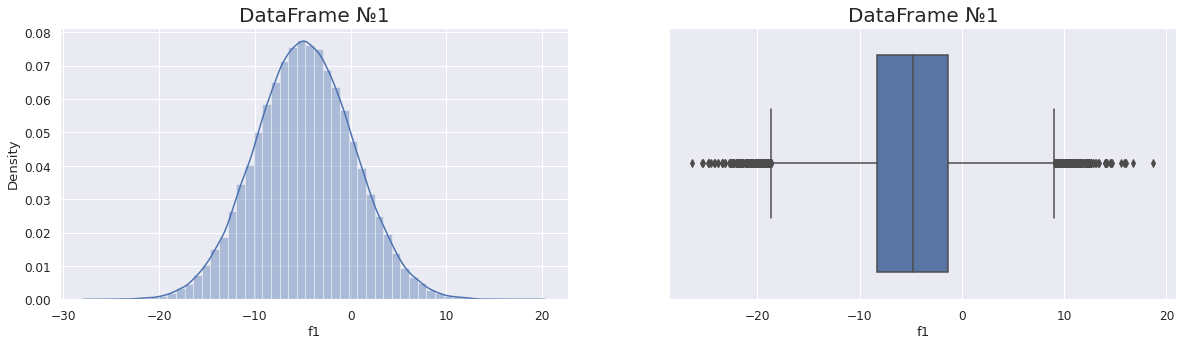

In [163]:
dist_and_box(df,'f1')

По признаку f1 один пик на значении 5. Медиана на значении 5, есть выбросы после -19 и 9.

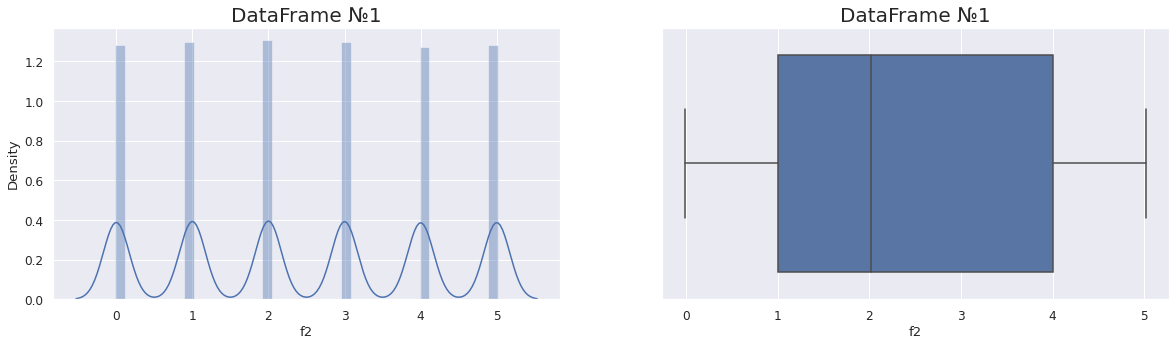

In [164]:
dist_and_box(df,'f2')

По признаку f2 много пиков в значениях. Медиана на значении 2, график смещён вправо.

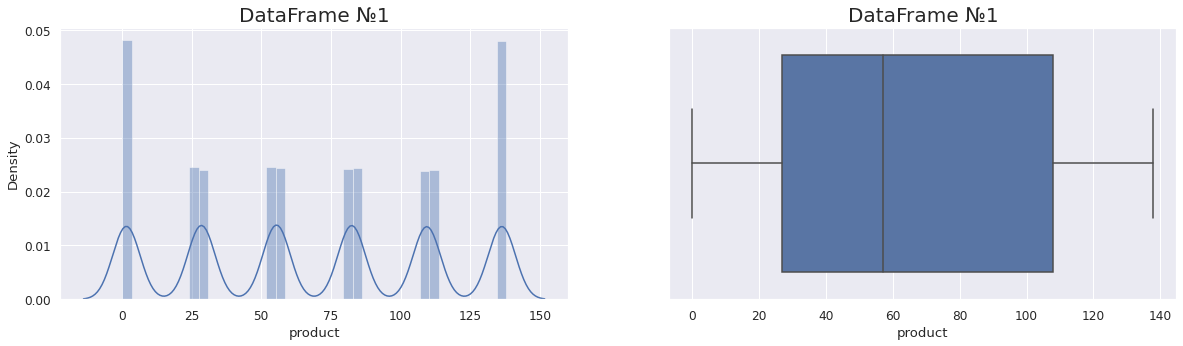

In [165]:
dist_and_box(df,'product')

В этом датасете странные пики, возможно из-за этих 12 неуникальных значени. Медиана близка к 60 и график смещён вправо.

Посмотрим на корреляцию.

Величина и сила коэффициента корреляции. Величина коэффициента корреляции отражает силы связи. При оценке силы связи коэффициентов корреляции используется шкала Чеддока (https://statpsy.ru/correlation/velicina/):

|Значение      |Интерпретация|
|:-------------|:------------|
|от 0 до 0,3   |очень слабая |
|от 0 до 0,3   |очень слабая |
|от 0,3 до 0,5 |слабая       |
|от 0, 5 до 0,7|средняя      |
|от 0,7 до 0, 9|высокая      |
|от 0,9 до 1   |очень высокая|

<AxesSubplot:>

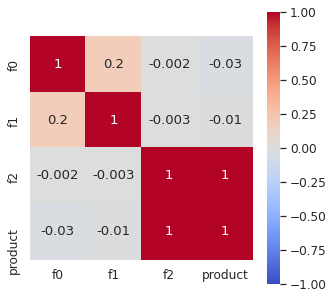

In [166]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True, ax = ax)

Есть слабая корреляция межжду f2 и product, остальная корреляция очень слабая.

In [167]:
#красивая визуализация, но исполняется долго
#sns.pairplot(data=df, hue = 'product')

**Опишем датасет df_2**

In [168]:
df = df_2
title = '2'

In [169]:
#статистическая таблица
df.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


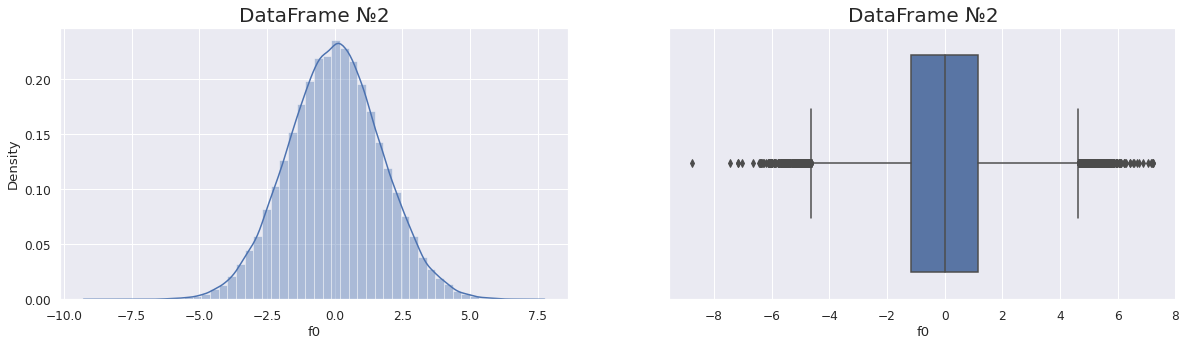

In [170]:
dist_and_box(df,'f0')

Наблюдается нормальное распределение значений, медиана на нулевом значении, выбросы свыше -4,5 и 4,5.

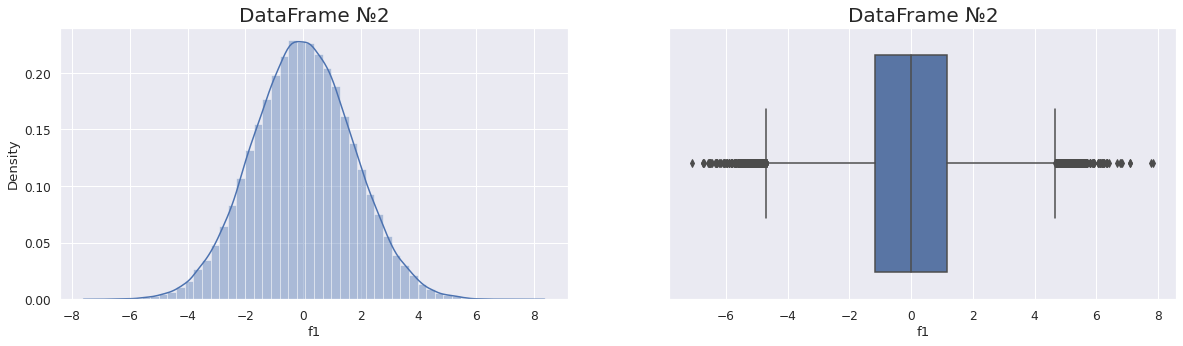

In [171]:
dist_and_box(df,'f1')

Здесть также значения распределились приблизительно также как и предъидущего признака.

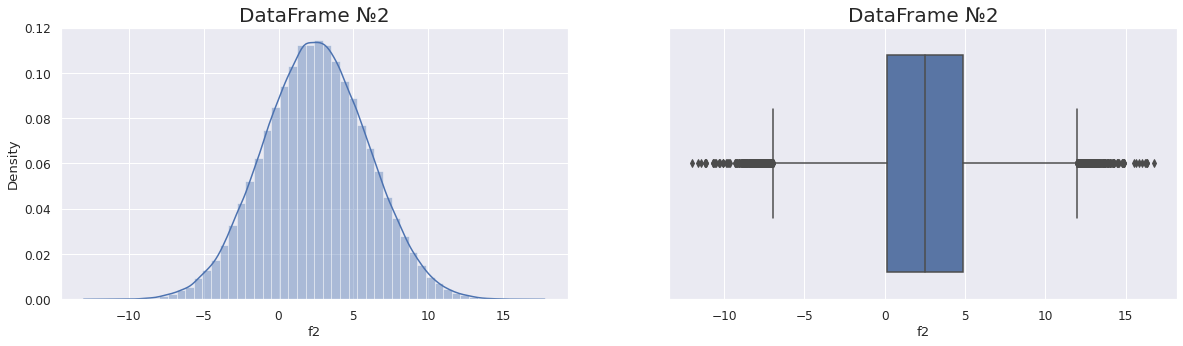

In [172]:
dist_and_box(df,'f2')

Значения распределились нормально, а вот медиана на 2,5, и много выбросов свыше -6 приблизительно  и 6.

Посмотрим на корреляцию.

Величина и сила коэффициента корреляции. Величина коэффициента корреляции отражает силы связи. При оценке силы связи коэффициентов корреляции используется шкала Чеддока (https://statpsy.ru/correlation/velicina/):

|Значение      |Интерпретация|
|:-------------|:------------|
|от 0 до 0,3   |очень слабая |
|от 0 до 0,3   |очень слабая |
|от 0,3 до 0,5 |слабая       |
|от 0, 5 до 0,7|средняя      |
|от 0,7 до 0, 9|высокая      |
|от 0,9 до 1   |очень высокая|

<AxesSubplot:>

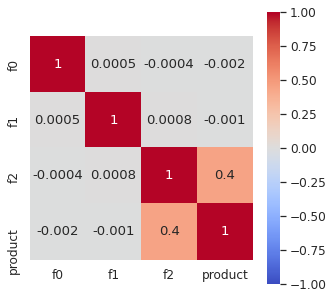

In [173]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True, ax = ax)

Здесь видна только одна зависимость и то слабая, между f2 и product.

In [174]:
#красивая визуализация, но исполняется долго
#sns.pairplot(data=df, hue = 'product')

**Вывод**

Открыли и посмотрели все датасеты, изучили их. Есть выбросы и 12 неуникальных значений. Так как данные синететические, то оставим всё как есть. Выбросы убирать не будем, поскольку  нам интересно обучить модель именно на таких данных. Переходим к обучению модели.

## Обучение и проверка модели

- Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
- Обучите модель и сделайте предсказания на валидационной выборке.
- Сохраните предсказания и правильные ответы на валидационной выборке.
- Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
- Проанализируйте результаты.
- Дополнтельно проверим модели каждого датасета кросс-валидацией.

Подготовим исходные данные для формирования дальнейших выборок для датасетов

In [175]:
def get_linear_regression_prediction_grid(df, target_column): 
   
    #выделим признаки 
    target = df[target_column] 
    features = df.drop([target_column,'id'], axis=1) 
  
    #разобьём данные на тестовую и валидационную выборки в соотношении 75:25 
    features_train, features_valid, target_train, target_valid = train_test_split( 
    features, target, test_size=0.25, random_state=12345) 
      
    #обучим модель 
    model = LinearRegression() 
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid) 
       
    #посчитаем метрики 
    metrics = {} 
    metrics['mean_fact_target'] = round(target.mean(),3) #средняя всего фактического сырья 
    metrics['mean_predict_valid'] =  round(predicted_valid.mean(),3) #средняя предсказанного сырья 
    metrics['mse'] =  round(mean_squared_error(target_valid, predicted_valid),3) #MSE модели
    metrics['rmse'] =  round(metrics['mse'] ** 0.5,3) #RMSE модели
    metrics['r2'] =  round(r2_score(target_valid, predicted_valid),3) #Коэффициент детерминации r2
    metrics['mae'] =  round(mean_absolute_error(target_valid, predicted_valid),3) #Mae модели
    scores = cross_val_score(model, features, target, cv=5) #средняя оценка качества модели  
    metrics['final_score'] = sum(scores) / len(scores)
    metrics["predicted_valid"] = predicted_valid 
    metrics["target_valid"] = target_valid 
      
    return metrics 


target_column = 'product' 

#Датасет 0 
metrics_df_0 = get_linear_regression_prediction_grid(df_0, target_column) 

#Датасет 1 
metrics_df_1 = get_linear_regression_prediction_grid(df_1, target_column) 

#Датасет 2 
metrics_df_2 = get_linear_regression_prediction_grid(df_2, target_column) 


In [176]:
#сделаем табличку, чтобы удобнее было делать выводы
index =['Средний запас фактического сырья', 
        'Средний запас предсказанного сырья', 
        'RMSE модели', 
        'Коэффициент детерминации r2',
        'Mae модели',
        'Средняя оценка качества модели']

df_0 = [metrics_df_0["mean_fact_target"],
        metrics_df_0["mean_predict_valid"], 
        metrics_df_0["rmse"],
        metrics_df_0["r2"],
        metrics_df_0["mae"],
        metrics_df_0["final_score"]] 
 
df_1 = [metrics_df_1["mean_fact_target"],
        metrics_df_1["mean_predict_valid"], 
        metrics_df_1["rmse"],
        metrics_df_1["r2"],
        metrics_df_1["mae"],
        metrics_df_1["final_score"]] 

df_2 = [metrics_df_2["mean_fact_target"],
        metrics_df_2["mean_predict_valid"], 
        metrics_df_2["rmse"],
        metrics_df_2["r2"],
        metrics_df_2["mae"],
        metrics_df_2["final_score"]]

list_tuples = list(zip(df_0, df_1, df_2)) 
 
dframe = pd.DataFrame(list_tuples, index = index, columns=['df_0', 'df_1', 'df_2']) 
 
display(dframe) 


,df_0,df_1,df_2
Средний запас фактического сырья,92.500000,68.825000,95.000000
Средний запас предсказанного сырья,92.593000,68.729000,94.965000
RMSE модели,37.579000,0.893000,40.030000
Коэффициент детерминации r2,0.280000,1.000000,0.205000
Mae модели,30.920000,0.719000,32.793000
Средняя оценка качества модели,0.275491,0.999624,0.198716


- Сравнение средних запасов сырья (фактического и предсказанного).
В датасете df_0 запас предсказанного сырья больше чем фактический. В остальных датасетах запас предсказанного ближе по значениям к фактическому.

- Чем ближе корень из средней квадратичной ошибки (RMSE) к нулю тем лучше.
Только у df_1 показатель RMSE меньше единицы, у остальных насного больше.

- В коэффициенте детерминации R2 наоборот, чем R2 ближе к единице тем лучше. 
Также у df_1 показатель R2 равен единице. Такой высокий коэффициент скорее всего из-за очень сильной связи целевого показателя с признаком 'f2'. У остальных датасетов показатели около 0,3.

- Метрика MAE среднее абсолютное отклонение так же как и RMSE чем ближе к нулю тем лучше. 
Опять df_1 показывает себя лучше по днной метрике.

- Средняя оценка качества модели кросс-валидацией.
Получается что самая высокая оценка качества у региона 1.

**Вывод**

- Обучили три модели по каждому из трех регионов.
- Запас среднего предсказаннного сырья в регионе 0 больше всего.
- Регион 1 по метрикам Mae, RMSE и r2 сильно отличны от других регоинов.
- По оценки качества модели егиона 1 также выделяется из всех.

## Подготовка к расчёту прибыли

- Все ключевые значения для расчётов сохраните в отдельных переменных.

Данные для расчётов:
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [190]:
COUNTS_OF_WELLS = 200 #200 лучших для разработки
BUDGET = 10000000000 #бюджет на разработку скважин в регионе — 10 млрд рублей. 
PRICE_ONE_THOUSAND_BARRELS = 450_000 #доход с каждой единицы продукта составляет 450 тыс. рублей

predicted_valid_0 = metrics_df_0["predicted_valid"] 
target_valid_0 = metrics_df_0["target_valid"]

predicted_valid_1 = metrics_df_1["predicted_valid"] 
target_valid_1 = metrics_df_1["target_valid"]

predicted_valid_2 = metrics_df_2["predicted_valid"] 
target_valid_2 = metrics_df_2["target_valid"]

- Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.

In [178]:
VOLUME_PRODUCTION = BUDGET / PRICE_ONE_THOUSAND_BARRELS / COUNTS_OF_WELLS 
display('Объем сырья: {:.3f}'.format(VOLUME_PRODUCTION))

'Объем сырья: 111.111'

**Вывод**

Получилось, что достаточный безубыточный объем превышает найденные ранее средние запасы в трёх регионах. 

## Расчёт прибыли и рисков 

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

- Выберите скважины с максимальными значениями предсказаний.
- Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитайте прибыль для полученного объёма сырья.

In [183]:
#функция выбирает скважины с максимальным значением предсказаний, 
#суммирует целевое значение объема сырья, соотвествуещего этим предсказаниям, 
#считает прибыль для полученного объема.

def profit(predictions, target): 
    predictions = pd.Series(predictions) 
    predictions.index = target.index 
    best_wells_predicted = predictions.sort_values(ascending=False)[:COUNTS_OF_WELLS] 
    a = target.loc[best_wells_predicted.index].sum() 
    return a * PRICE_ONE_THOUSAND_BARRELS - BUDGET     
 
display('Прибыль df_0: {:.2f} млн. руб'.format(profit(predicted_valid_0, target_valid_0) / 1000000)) 
display('Прибыль df_1: {:.2f} млн. руб'.format(profit(predicted_valid_1, target_valid_1) / 1000000)) 
display('Прибыль df_2: {:.2f} млн. руб'.format(profit(predicted_valid_2, target_valid_2) / 1000000))

'Прибыль df_0: 3320.83 млн. руб'

'Прибыль df_1: 2415.09 млн. руб'

'Прибыль df_2: 2710.35 млн. руб'

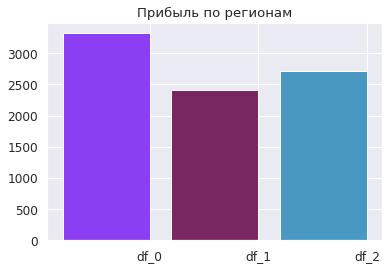

In [184]:
index = np.arange(3)
values = [3320.83, 2415.09, 2710.35]
plt.title('Прибыль по регионам')
plt.bar(index, values)
plt.xticks(index+0.4,['df_0','df_1','df_2'])

color_rectangle = np.random.rand(7, 3)    # RGB
plt.bar(index, values, color = color_rectangle)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')

plt.show()

Прибыль по региону 0 показана больше чем по другим регионам.

Посчитайте риски и прибыль для каждого региона:

- Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [185]:
state = np.random.RandomState(12345) 
 
#Функция применяет технику Bootstrap c 1000 выборок, чтобы найти распределение прибыли. 
#Возвращает доверительный интервал, риск убытков и среднее значение прибыли по региону.   
    
def bootstrap(predictions, target):     
    predictions = pd.Series(predictions) # превращаем в объект типа series, так как у нас array 
    predictions.index = target.index # чтобы у таргета и валид были одинаковые индексы 
     
    values = [] 
    for i in range(1000): 
        target_subsample = target.sample(n=500, replace=False, random_state=state) 
        predicted_subsample = predictions.loc[target_subsample.index] 
        values.append(profit(predicted_subsample, target_subsample)) 
           
    values = pd.Series(values) 
     
    risks = (values < 0).mean() 
    lower = values.quantile(0.025) 
    upper = values.quantile(0.975) 
    mean = values.mean() 
     
    return lower, upper, mean, risks

In [186]:
lower_0, upper_0, mean_0, risk_0 = bootstrap(predicted_valid_0, target_valid_0) 
lower_1, upper_1, mean_1, risk_1 = bootstrap(predicted_valid_1, target_valid_1) 
lower_2, upper_2, mean_2, risk_2 = bootstrap(predicted_valid_2, target_valid_2) 

In [187]:
#Функция для вывода доверит интервала, среднего значения прибыли в регионе, риска убытков.
def output(lower, upper, mean, risk, name): 
    display('Регион {}'.format(name)) 
    display('95% доверительный интервал от {:.2f} млн.руб до {:.2f} млн.руб'.format(lower/1000000, upper/1000000)) 
    display('Среднее значение прибыли в регионе: {:.2f} {}'.format(mean/1000000, 'млн. рублей')) 
    display('Риск убытков: {:.0%}'.format(risk)) 

In [188]:
output(lower_0, upper_0, mean_0, risk_0, 'df_0')
output(lower_1, upper_1, mean_1, risk_1, 'df_1') 
output(lower_2, upper_2, mean_2, risk_2, 'df_2') 

'Регион df_0'

'95% доверительный интервал от -126.95 млн.руб до 879.61 млн.руб'

'Среднее значение прибыли в регионе: 380.71 млн. рублей'

'Риск убытков: 7%'

'Регион df_1'

'95% доверительный интервал от 46.73 млн.руб до 840.21 млн.руб'

'Среднее значение прибыли в регионе: 454.79 млн. рублей'

'Риск убытков: 1%'

'Регион df_2'

'95% доверительный интервал от -115.61 млн.руб до 906.51 млн.руб'

'Среднее значение прибыли в регионе: 389.22 млн. рублей'

'Риск убытков: 7%'

*Визуализация данных*

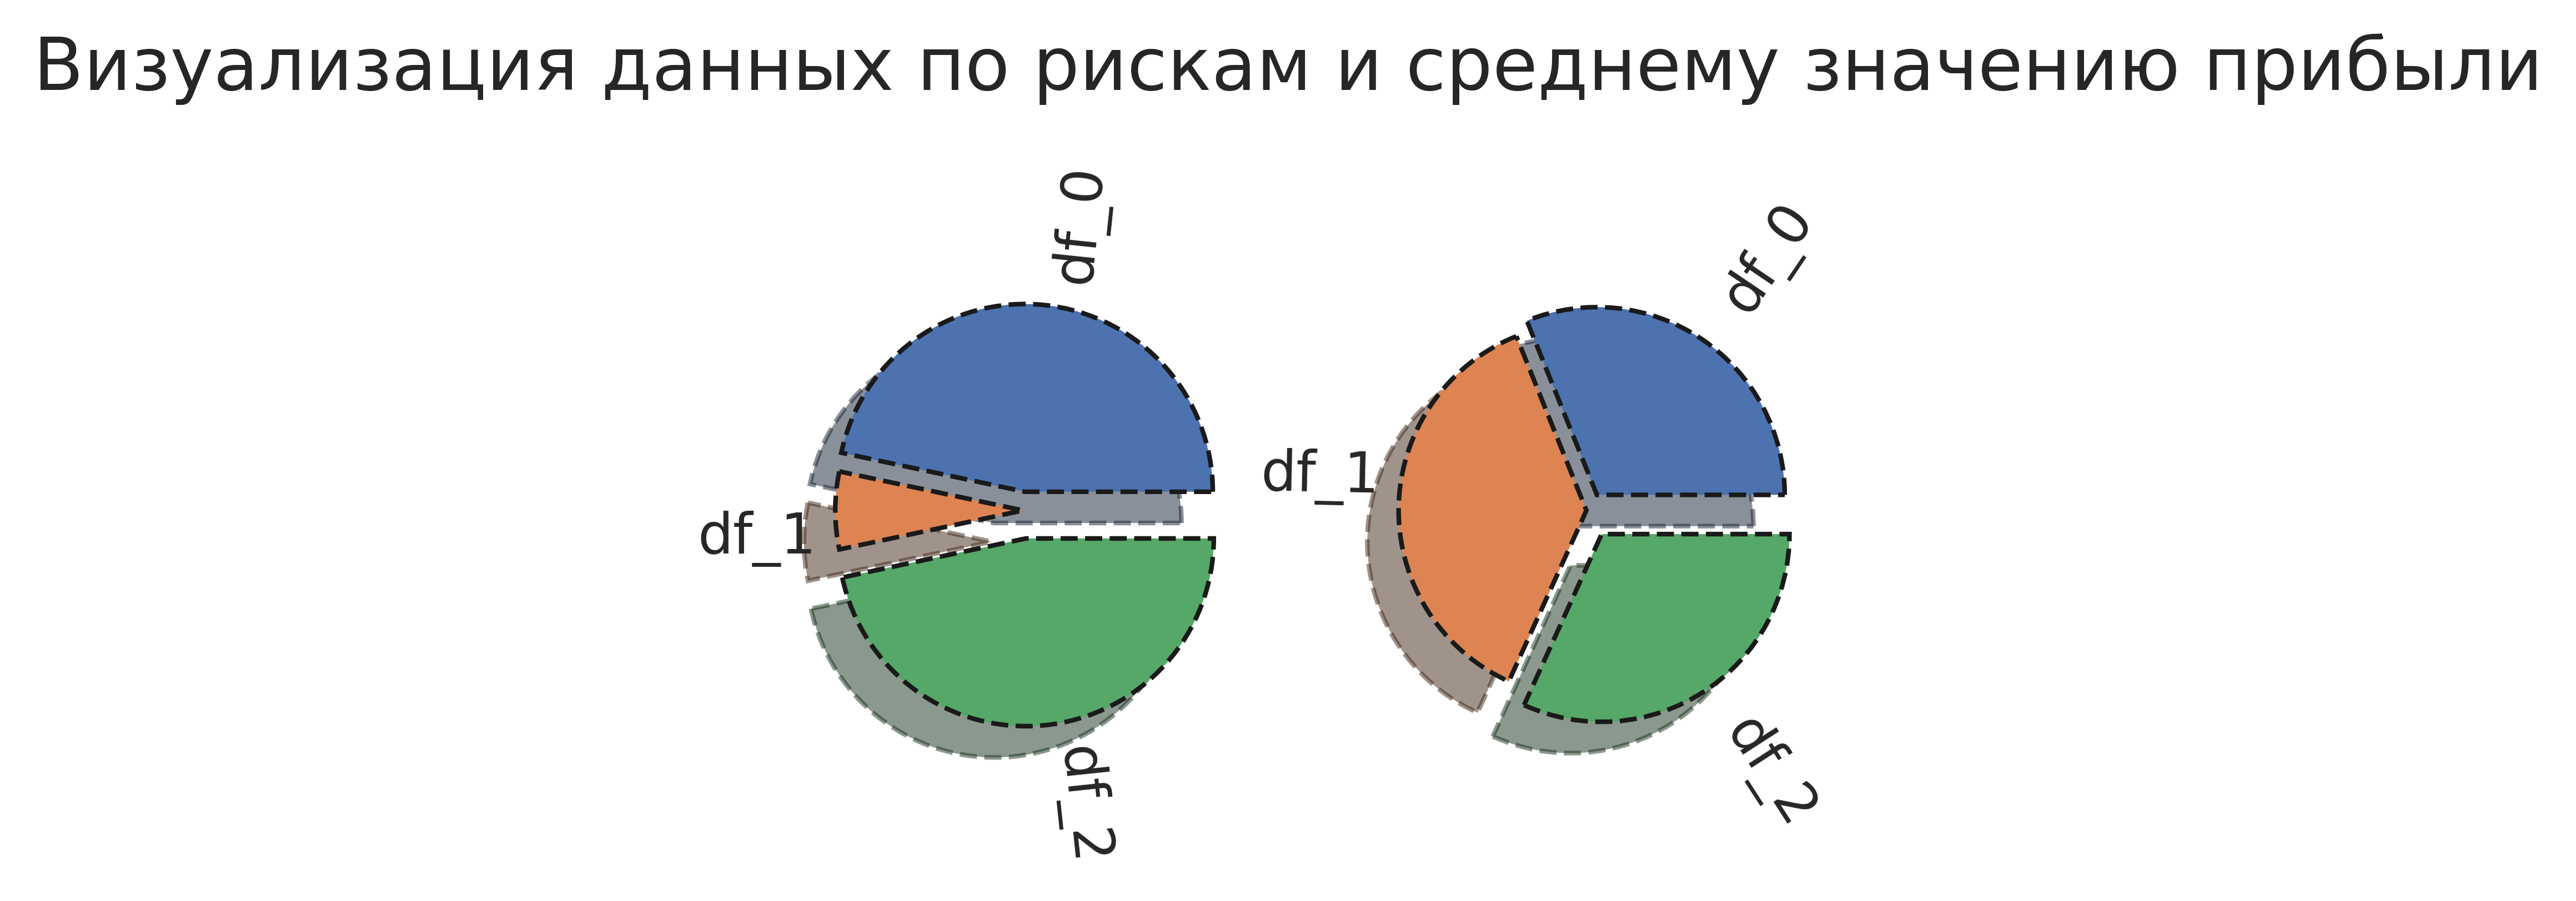

In [189]:
vals1 = [7, 1, 7]
vals2 = [380.71, 454.79, 389.22]

labels = ["df_0", "df_1", "df_2"]

explode = (0.1, 0, 0.15)

fig = plt.figure(figsize=(4,3),dpi=600)
plt.suptitle("Визуализация данных по рискам и среднему значению прибыли")

ax1 = fig.add_subplot(121)
ax1.pie(vals1, labels=labels, shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
#ax1.set_title("Риски")

ax2 = fig.add_subplot(122)
ax2.pie(vals2, labels=labels, shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
#ax2.set_title("Прибыль")

plt.show()

Мы видим 1 регион (df_1), где вероятность убытков меньше 2.5%. Можно сказать, что это привлекательный регион для бурения новой скважены. Однако данные по нему были не совсем в порядке. Прежде чем рекомендовать данный регион для бурения новой скважены,  ситуацию с данными лучше уточнить у заказчика. 

**Вывод**

- В ходе предобработки данных был удалён столбец id, поскольку не несёт значимости для исследования.
- С помощью Bootstrap из 1000 выборок выявили среднюю прибыль по трем регионам, риски и 95% доверительный интервал. 
- Самым привлекательным оказался регион 1, однако сложно сразу рекомендовать его, так как его данные необходимо уточнить.